# Python Control Library 
A quick intro tutorial to the control library and its features.

## Installation

Run the commands (shift+enter) in the next cell to install the [Python Control Systems Library](https://github.com/python-control/python-control).

In [ ]:
! git clone https://github.com/python-control/python-control.git
! cd python-control && python setup.py install --user

If the installation is successful, you should see no errors in the next cell.

In [4]:
import control

We'll start by simulating this simple open loop plant model shown in the SVG diagram below. TikZ code for the diagram [available](https://www.overleaf.com/read/kdsvmqqnhprz) on Overleaf.

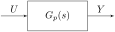

In [5]:
from IPython.core.display import SVG
SVG(filename='open_loop.svg')

## Define your transfer function
We can use `control.tf` to define our transfer function. It takes in 2 input arrays, the coefficients for the numerator and the coefficients for the denominator.

In [6]:
# Transfer function for our plant, with 1 as the numerator and 2s+1 for the denominator
A = 2
B = 1
G_p = control.tf([1], [A, B])

In [7]:
# Print the transfer function
print(G_p)


   1
-------
2 s + 1



Yay, it works.

You can also define the transfer function symbolically using $s$ by doing the following.

In [8]:
s = control.tf([1,0],[1])

In [9]:
G_p = 1/(2*s+1)
print(G_p)


   1
-------
2 s + 1



Observe that you get the same results. Now let's grab the step response for this transfer function using the control library.

## Step Response
We will use `control.step_response` to get the step response from our transfer function. It takes in 2 arguments, a time array and the transfer function, and returns the time array and the output.

In [12]:
import numpy as np

# Array of 20 sample points, from 0 to 20 seconds
T = np.linspace(0,20,20)

# Grab the response
T, Y = control.step_response(G_p, T=T)

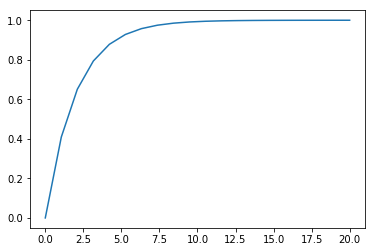

In [13]:
# Now let's visualize it
% matplotlib inline
import matplotlib.pyplot as plt
plt.plot(T,Y)

## Aside: Plotting tricks
Not bad, but we can make the graphics look nicer by adjusting some plot handles:

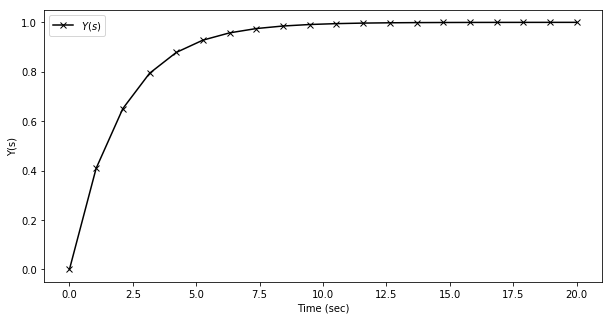

In [16]:
# Add legend and labels
fig = plt.figure(figsize=(10,5))
plt.plot(T,Y, '-kx', label='$Y(s)$')
plt.xlabel('Time (sec)')
plt.ylabel('Y(s)')
plt.legend()

We can use the Seaborn library for some nice defaults, since it's not THAT easy to get a good-looking plot.

In [19]:
import seaborn as sb

# Use the poster style and a whitegrid
plt.style.use('seaborn')
sb.set_context('poster')
sb.set_style('whitegrid')

Text(0,0.5,'Y(s)')

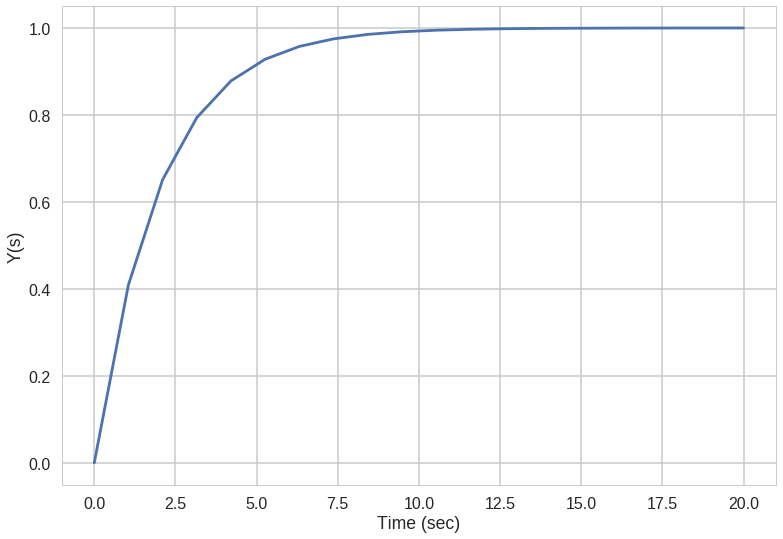

In [20]:
# Redo our plotting using the new Seaborn style
plt.plot(T,Y)
plt.xlabel('Time (sec)')
plt.ylabel('Y(s)')

Text(0,0.5,'Y(s)')

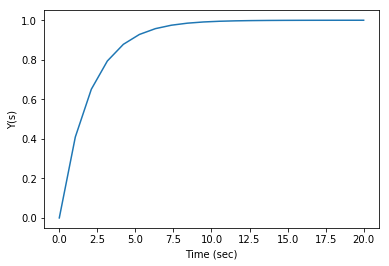

In [21]:
# If you don't like it, reset the style using reset_orig()
sb.reset_orig()
plt.plot(T,Y)
plt.xlabel('Time (sec)')
plt.ylabel('Y(s)')

## Poles and Zeros
The control library can also tell us the poles and zeros.

In [22]:
print('Poles: ', control.pole(G_p))
print('Zeros: ', control.zero(G_p))

Poles:  [-0.5]
Zeros:  []


To be continued